In [ ]:
# # BGR, BGRA, Ahlpha 채널 (rgba.py)

# import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow

# # 기본 값 옵션
# img = cv2.imread('0.png')   
# # IMREAD_COLOR 옵션                   
# bgr = cv2.imread('0.png', cv2.IMREAD_COLOR)    
# # IMREAD_UNCHANGED 옵션
# bgra = cv2.imread('0.png', cv2.IMREAD_UNCHANGED) 
# # 각 옵션에 따른 이미지 shape
# print("default", img.shape, "color", bgr.shape, "unchanged", bgra.shape) 



# cv2.imshow('bgr', bgr)
# cv2.imshow('bgra', bgra)
# cv2.imshow('alpha', bgra[:,:,3])  # 알파 채널만 표시
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# source_image = cv2.imread("6LfDs.png") #Image of cat with text watermark
# text = cv2.imread("gJAAx.png", cv2.IMREAD_UNCHANGED) #Image of text

# correcting_matrix = ((255 -text[:,:,3]) /255) #Matrix of "how much this pixel was darkened by applying text overlay"
# original_image = (source_image / correcting_matrix[:,:,np.newaxis]).astype(np.uint8) 

# cv2.imwrite("original_image.png", original_image)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
source_image = cv2.imread("cattext.png") #Image of cat with text watermark
text = cv2.imread("textwatermark.png", cv2.IMREAD_UNCHANGED) #Image of text

correcting_matrix = ((255 -text[:,:,3]) /255) #Matrix of "how much this pixel was darkened by applying text overlay"
original_image = (source_image / correcting_matrix[:,:,np.newaxis]).astype(np.uint8) 

cv2.imwrite("0.png", original_image)

True

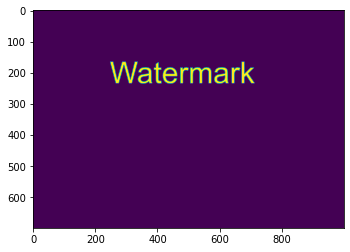

In [ ]:

plt.imshow(test_image)

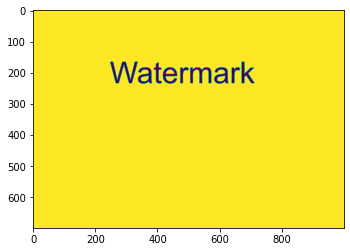

In [ ]:

plt.imshow(correcting_matrix)

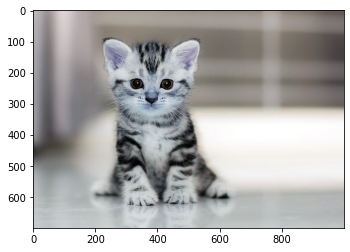

In [ ]:
plt.imshow(original_image)

In [ ]:
img = cv2.imread('ultrasound.png')
mask = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY)[1][:,:,0]
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

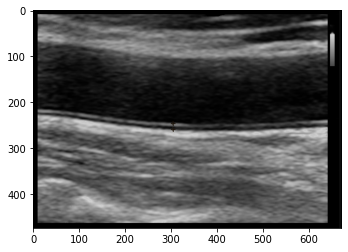

In [ ]:
plt.imshow(img)
plt.imshow(mask)
plt.imshow(dst)

In [ ]:
cv2.imwrite("00001.png", dst)

True

In [ ]:
crosses = mask[235:267,290:320] | mask[233:265,288:318]
mask[235:267,290:320] = crosses
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

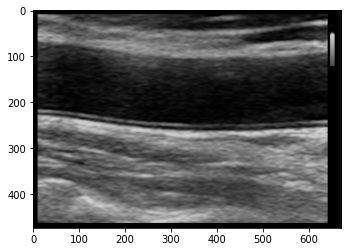

In [ ]:
plt.imshow(dst)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('patient.jpg')
mask = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY)[1][:,:,0]
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

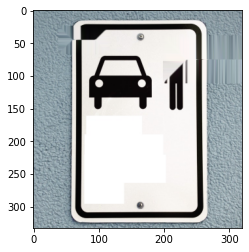

In [ ]:
# plt.imshow(img)
# plt.imshow(mask)
plt.imshow(dst)

In [ ]:
crosses = mask[235:267,290:320] | mask[233:265,288:318]
mask[235:267,290:320] = crosses
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

In [ ]:
plt.imshow(dst)

In [ ]:
############### 시작

In [ ]:
pip install easyocr

In [ ]:
pip install googletrans

4.5.4-dev


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


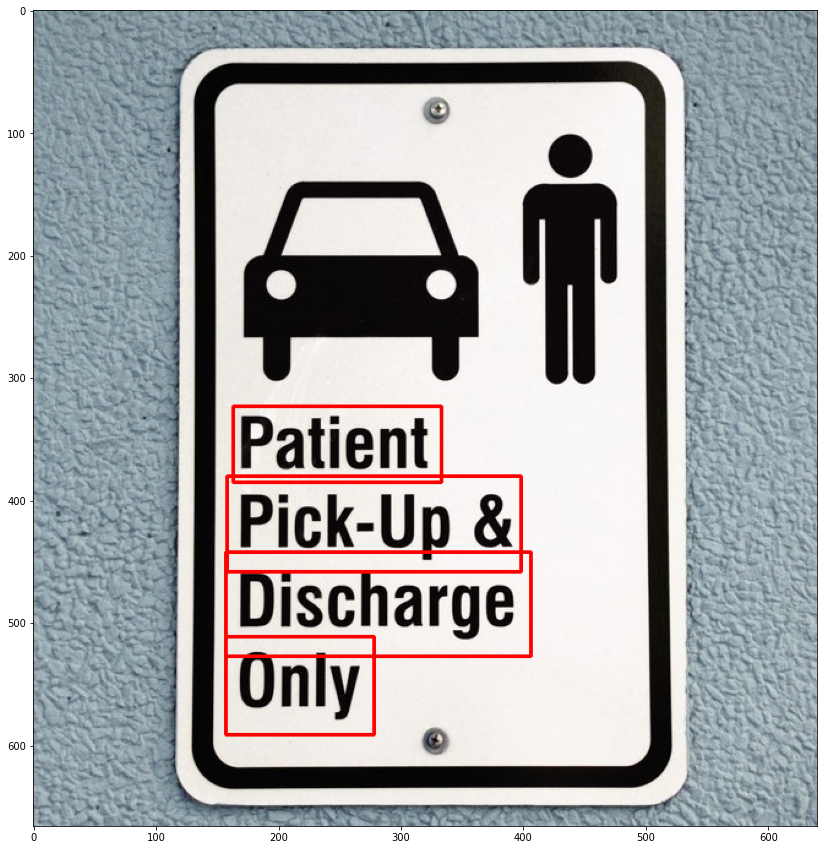

Text_list : ['Patient', 'Pick-Up &', 'Discharge', 'Only']
Tranlated_texts : ['환자', '픽업 &', '퇴원', '오직']


In [ ]:
import cv2
import matplotlib.pyplot as plt
import easyocr
import sys
import googletrans
from typing import List
import requests
import pprint

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

print(cv2.__version__)

# 이미지 파일 경로
file_path = r'patient.jpg'
img = cv2.imread(file_path, cv2.IMREAD_COLOR)

CLIENT_ID = "MawiiHEojSbWlRvZjWEM"
CLIENT_SECRET = "gY1PNWHP54"

if img is None:
    print('Image load failed!')
    sys.exit()


# 이미지 출력함수
def display(img):
    # img_rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.show()


def cleanup_text(text):
    # strip out non-ASCII text so we can draw the text on the image
    # using OpenCV
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()


def easy_ocr_result(img, language='en', draw=True, text=False):
    reader = easyocr.Reader([language])
    results = reader.readtext(img)

    # 바운딩박스 리스트
    bbox_list = []
    # 텍스트 리스트
    text_list = []

    if draw == False: # 원래 이미지만 출력
        display(img)

    elif draw == True and text == False: # 이미지에 바운딩 박스그리기
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)
            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            cv2.rectangle(img2, tl, br, (255, 0, 0), 2)

        # show the output image
        display(img2)

    elif draw == True and text == True:  # 이미지에 바운딩 + 인식한 글자
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)

            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            text = cleanup_text(text)
            cv2.rectangle(img2, tl, br, (255, 0, 0), 2)
            cv2.putText(img2, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

        # show the output image
        display(img2)
    return bbox_list, text_list


def translate_texts(texts: List[str], type='google') -> List[str]:
    global tranlated_texts
    if type == 'google':
        translator = googletrans.Translator()
        tranlated_texts = [
            translator.translate(text=text, src='en', dest='ko').text
            for text in texts
        ]
    elif type == 'naver':
        url = "https://openapi.naver.com/v1/papago/n2mt"
        header = {"X-Naver-Client-Id": CLIENT_ID, "X-Naver-Client-Secret": CLIENT_SECRET}
        tranlated_texts = []
        for text in texts:
            data = {'text': text, 'source': 'en', 'target': 'ko'}
            response = requests.post(url, headers=header, data=data)
            rescode = response.status_code
            if rescode == 200:
                t_data = response.json()
                tranlated_texts.append(t_data['message']['result']['translatedText'])
            else:
                print("Error Code:", rescode)

    return tranlated_texts


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    _, text_list = easy_ocr_result(img)
    print('Text_list :', text_list)
    tranlated_texts: List[str] = translate_texts(texts=text_list, type='naver')
    print(f'Tranlated_texts : {tranlated_texts}')


4.5.4-dev


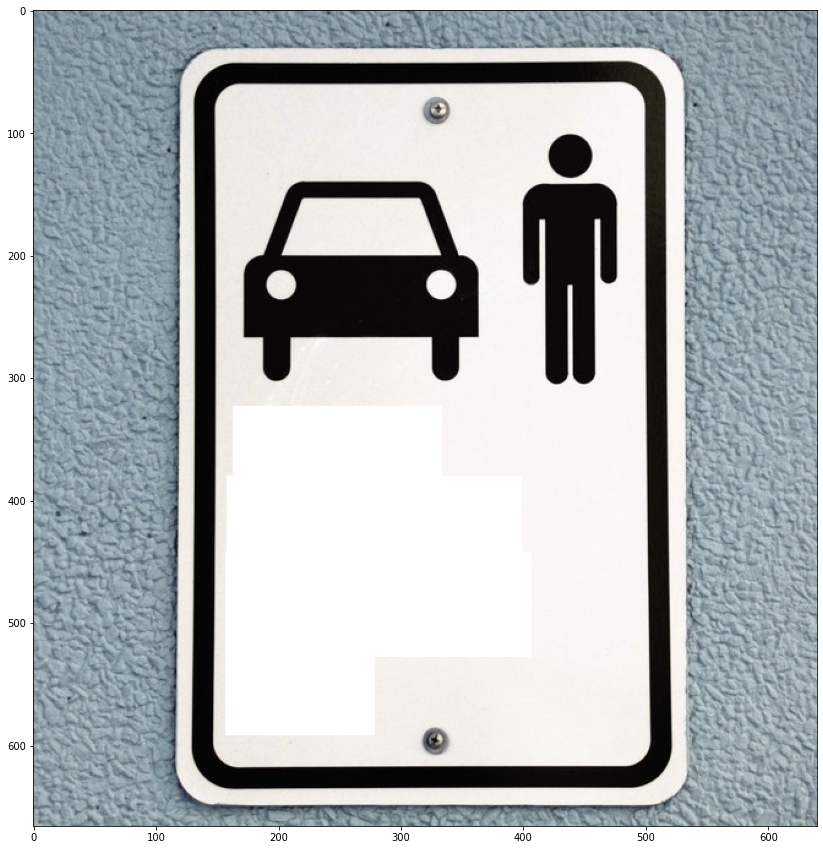

bbox_list : [[[163, 323], [333, 323], [333, 385], [163, 385]], [[158, 380], [398, 380], [398, 458], [158, 458]], [[157, 442], [406, 442], [406, 527], [157, 527]], [[157, 511], [278, 511], [278, 591], [157, 591]]]
text_list : ['Patient', 'Pick-Up &', 'Discharge', 'Only']


In [ ]:
import cv2
import matplotlib.pyplot as plt
import easyocr
import sys
import googletrans
from typing import List
import requests
import pprint

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

print(cv2.__version__)

# 이미지 파일 경로
file_path = r'patient.jpg'
img = cv2.imread(file_path, cv2.IMREAD_COLOR)

CLIENT_ID = "MawiiHEojSbWlRvZjWEM"
CLIENT_SECRET = "gY1PNWHP54"

if img is None:
    print('Image load failed!')
    sys.exit()


# 이미지 출력함수
def display(img):
    # img_rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.show()


def cleanup_text(text):
    # strip out non-ASCII text so we can draw the text on the image
    # using OpenCV
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()


def easy_ocr_result(img, language='en', draw=True, text=False):
    reader = easyocr.Reader([language])
    results = reader.readtext(img)

    # 바운딩박스 리스트
    bbox_list = []
    # 텍스트 리스트
    text_list = []

    if draw == False: # 원래 이미지만 출력
        display(img)

    elif draw == True and text == False: # 이미지에 바운딩 박스그리기
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)
            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            cv2.rectangle(img2, tl, br, (255, 255, 255), -1) # white box -1

        # show the output image
        display(img2)
        cv2.imwrite("target.jpg", img2) # img2 파일저장 "target.jpg"

    elif draw == True and text == True:  # 이미지에 바운딩 + 인식한 글자
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)

            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            text = cleanup_text(text)
            cv2.rectangle(img2, tl, br, (255, 0, 0), 2)
            cv2.putText(img2, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

        # show the output image
        display(img2)
    return bbox_list, text_list
# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    bbox_list, text_list = easy_ocr_result(img)
    print('bbox_list :', bbox_list)
    print('text_list :', text_list)

In [ ]:
    bbox_list

[[[163, 323], [333, 323], [333, 385], [163, 385]],
 [[158, 380], [398, 380], [398, 458], [158, 458]],
 [[157, 442], [406, 442], [406, 527], [157, 527]],
 [[157, 511], [278, 511], [278, 591], [157, 591]]]

In [ ]:
# cv2.rectangle(shapes, (163, 323), (333, 385), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (158, 380), (398, 458), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (157, 442), (406, 527), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (157, 511), (278, 591), (255, 255, 255), cv2.FILLED)


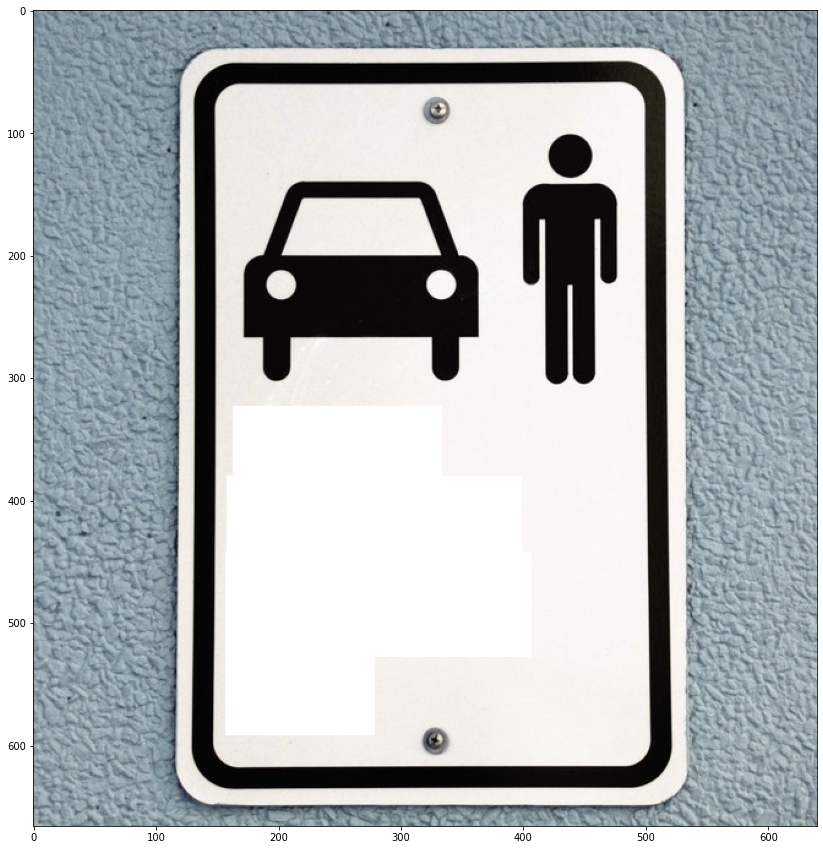

([[[163, 323], [333, 323], [333, 385], [163, 385]],
  [[158, 380], [398, 380], [398, 458], [158, 458]],
  [[157, 442], [406, 442], [406, 527], [157, 527]],
  [[157, 511], [278, 511], [278, 591], [157, 591]]],
 ['Patient', 'Pick-Up &', 'Discharge', 'Only'])

In [ ]:
easy_ocr_result(img)

In [ ]:
plt.imshow(easy_ocr_result(img))

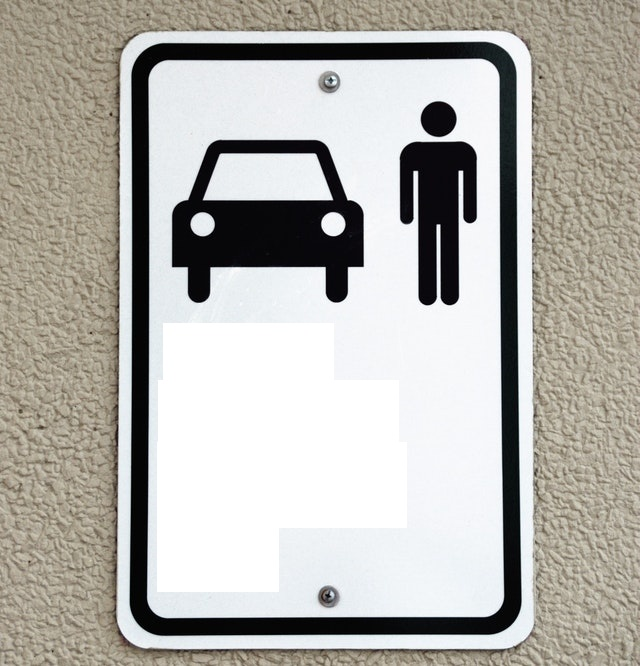

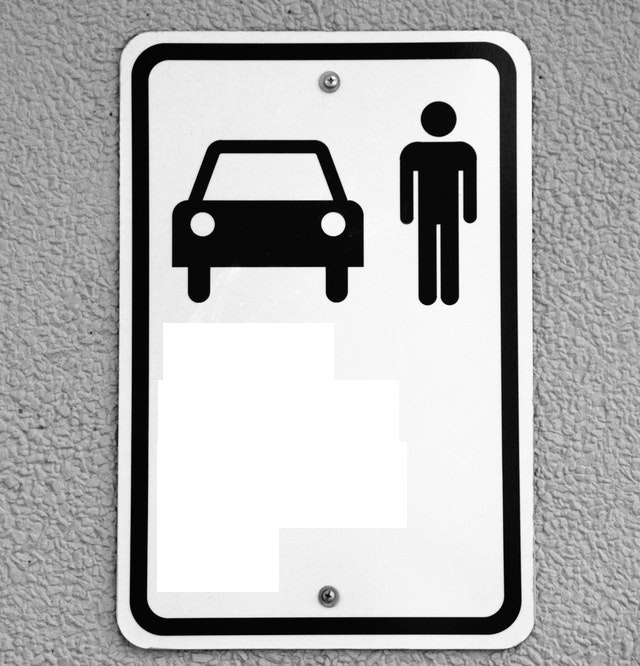

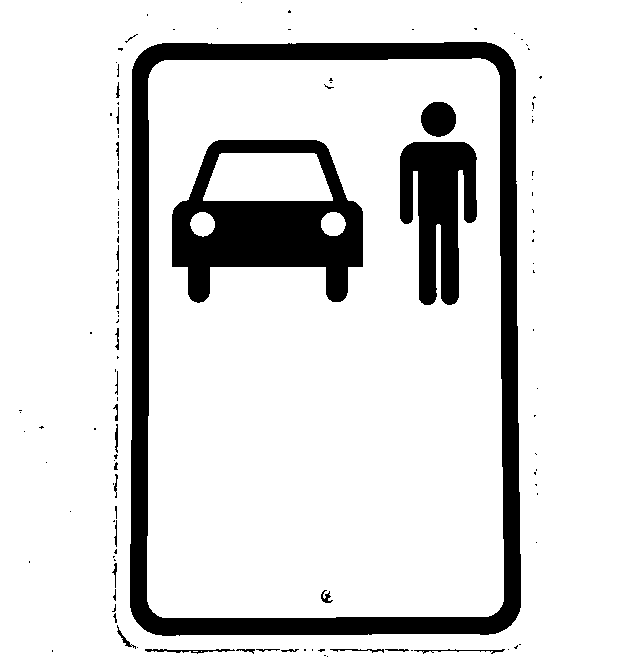

In [ ]:
from google.colab.patches import cv2_imshow


src = cv2.imread('target.jpg', cv2.IMREAD_COLOR)
dst = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(dst, 80, 255, cv2.THRESH_BINARY)

cv2_imshow(src)
cv2_imshow(dst)
cv2_imshow(mask)

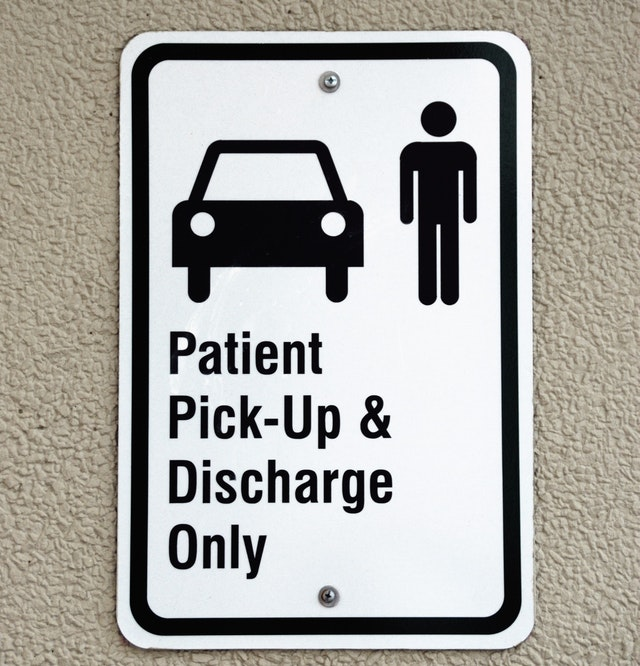

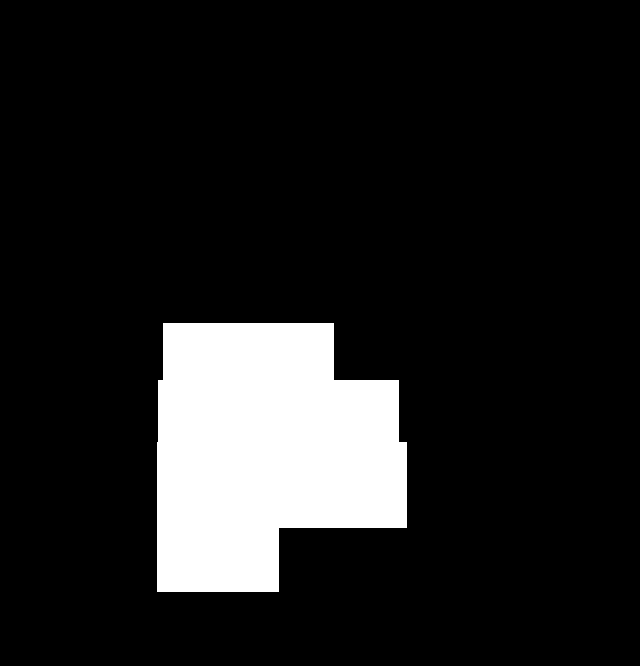

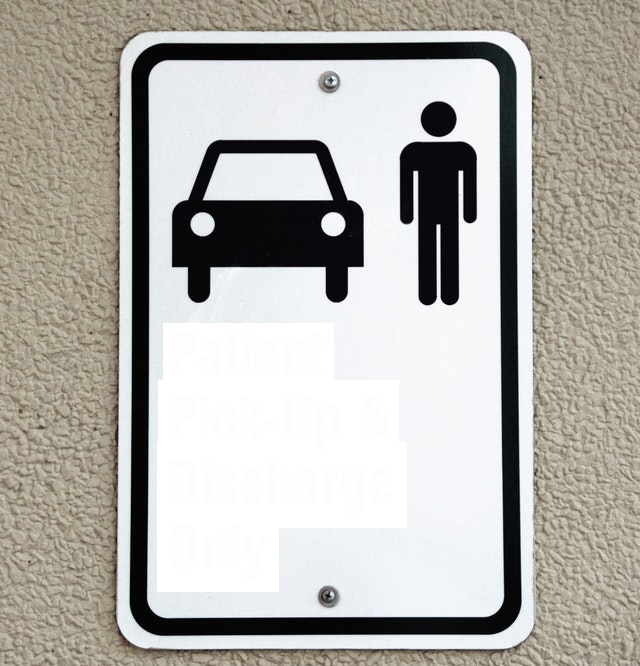

True

In [ ]:
# shapes
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load image
img = cv2.imread('patient.jpg')

# Initialize blank mask image of same dimensions for drawing the shapes
shapes = np.zeros_like(img, np.uint8)

# Draw shapes
cv2.rectangle(shapes, (163, 323), (333, 385), (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, (158, 380), (398, 458), (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, (157, 442), (406, 527), (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, (157, 511), (278, 591), (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, bbox_list[0][0],bbox_list[0][2], (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, bbox_list[1][0],bbox_list[1][2], (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, bbox_list[2][0],bbox_list[2][2], (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, bbox_list[3][0],bbox_list[3][2], (255, 255, 255), cv2.FILLED)

# Generate output by blending image with shapes image, using the shapes
# images also as mask to limit the blending to those parts
out = img.copy()
alpha = 0.01
mask = shapes.astype(bool)
out[mask] = cv2.addWeighted(img, alpha, shapes, 1 - alpha, 0)[mask]

# Visualization
cv2_imshow(img)
cv2_imshow(shapes)

cv2_imshow(out)


#
cv2.imwrite("shapes.jpg", shapes)


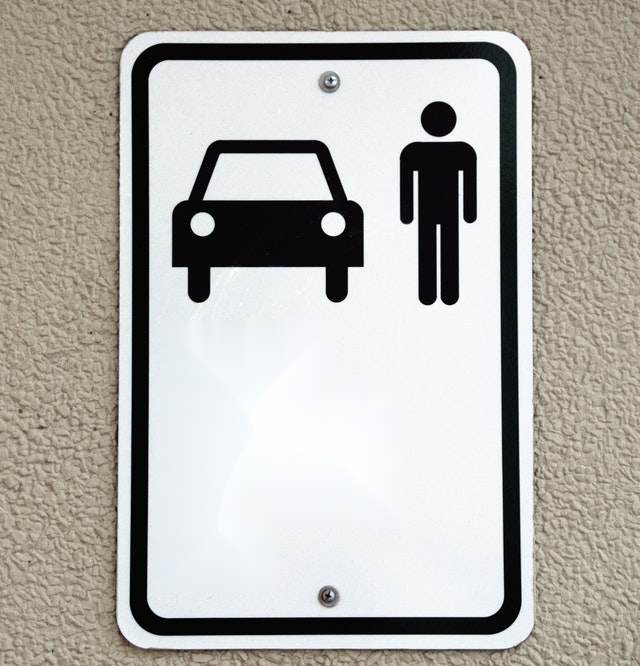

True

In [ ]:
# inpaint
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('target.jpg')
mask = cv2.imread('shapes.jpg',0)
dst = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
cv2_imshow(dst)

# 저장
cv2.imwrite("inpaint.jpg", dst)

In [ ]:
from PIL import Image 
from PIL import ImageFont
from PIL import ImageDraw

# db.set_character_set('utf8')
# dbc.execute('SET NAMES utf8;')
# dbc.execute('SET CHARACTER SET utf8;')
# dbc.execute('SET character_set_connection=utf8;')


# font = ImageFont.load_default()
font = ImageFont.truetype("NotoSansKR-Black.otf", 58)
img = Image.open('inpaint.jpg')

draw = ImageDraw.Draw(img)


# draw.text((163, 323), (333, 385)),"AAAAAAAAAAA!",(0,0,0),font=font)
# draw.text((158, 380), (398, 458)),"BBBBBBB & !",(0,0,0),font=font)
# draw.text((157, 442), (406, 527)),"CCCCCC !",(0,0,0),font=font)
# draw.text((157, 511), (278, 591)),"DDDDD !",(0,0,0),font=font)

# text = "안녕"
# draw.text((0, 150), text, (0, 0, 0), font=font)

# draw.text((163, 323),"환  자 ",(0,0,0),font=font)
# draw.text((158, 380),"픽  업  & ",(0,0,0),font=font)
# draw.text((157, 442),"퇴  원 ",(0,0,0),font=font)
# draw.text((157, 511),"오  직 ",(0,0,0),font=font)

draw.text(bbox_list[0][0], tranlated_texts[0], (0,0,0), font=font)
draw.text(bbox_list[1][0], tranlated_texts[1], (0,0,0), font=font)
draw.text(bbox_list[2][0], tranlated_texts[2], (0,0,0), font=font)
draw.text(bbox_list[3][0], tranlated_texts[3], (0,0,0), font=font)
# cv2.rectangle(shapes, (163, 323), (333, 385), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (158, 380), (398, 458), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (157, 442), (406, 527), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (157, 511), (278, 591), (255, 255, 255), cv2.FILLED)
# Tranlated_texts : ['환자', '픽업 &', '퇴원', '오직']
# ([[[163, 323], [333, 323], [333, 385], [163, 385]],
#   [[158, 380], [398, 380], [398, 458], [158, 458]],
#   [[157, 442], [406, 442], [406, 527], [157, 527]],
#   [[157, 511], [278, 511], [278, 591], [157, 591]]],
# cv2.rectangle(shapes, (163, 323), (333, 385), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (158, 380), (398, 458), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (157, 442), (406, 527), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (157, 511), (278, 591), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, bbox_list[0][0],bbox_list[0][2], (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, bbox_list[1][0],bbox_list[1][2], (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, bbox_list[2][0],bbox_list[2][2], (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, bbox_list[3][0],bbox_list[3][2], (255, 255, 255), cv2.FILLED)

# draw=ImageDraw.Draw(im)
# draw.text((13,75),"르브론 제임스 \nLA레이커스",font=ImageFont.truetype("SCDream7.otf", 16), fill=(255,255,255)) 
# im.save("title.png")

img.show()
img.save("img_text.jpg")



In [ ]:
# 끝-imgtext.jpg

In [ ]:
import PIL
from PIL import Image,ImageDraw,ImageFont
import os

target_image = Image.open('inpaint.jpg')  #일단 기본배경폼 이미지를 open 합니다.
fontsFolder = 'NanumGothic.ttf'    



selectedFont = ImageFont.truetype(os.path.join(fontsFolder, 'NanumGothic.ttf'), 24) #폰트경로과 사이즈를 설정해줍니다.
draw =ImageDraw.Draw(target_image)
draw.text( ((163, 323), (333, 385)), keyword,fill=(0, 0, 0), font=selectedFont)
# fill= 속성은 무슨 색으로 채울지 설정,font=는 자신이 설정한 폰트 설정
target_image.save('imgtext2.jpg') #편집된 이미지를 저장합니다.

OSError: ignored

In [ ]:
# from PIL import Image, ImageDraw, ImageFont

# img = Image.open('inpaint.jpg')
# d1 = ImageDraw.Draw(img)
# myFont = ImageFont.truetype('E:/PythonPillow/Fonts/FreeMono.ttf', 40)
# d1.text((0, 0), "Sample text", font=myFont, fill =(255, 0, 0))
# img.show()
# img.save("imgtext.jpg")
# ---------------------
# from PIL import Image, ImageDraw, ImageFont

# unicode_text = u"Hello World!"
# font = ImageFont.truetype("arial.ttf", 28, encoding="unic")
# text_width, text_height = font.getsize(unicode_text)
# canvas = Image.new('RGB', (text_width + 10, text_height + 10), "orange")
# draw = ImageDraw.Draw(canvas)
# draw.text((5, 5), u'Hello World!', 'blue', font)
# canvas.save("unicode-text.png", "PNG")
# canvas.show()

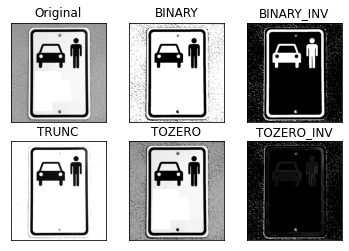

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('target.jpg',0)

ret, thresh1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
	plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
	plt.title(titles[i])
	plt.xticks([]),plt.yticks([])

plt.show()

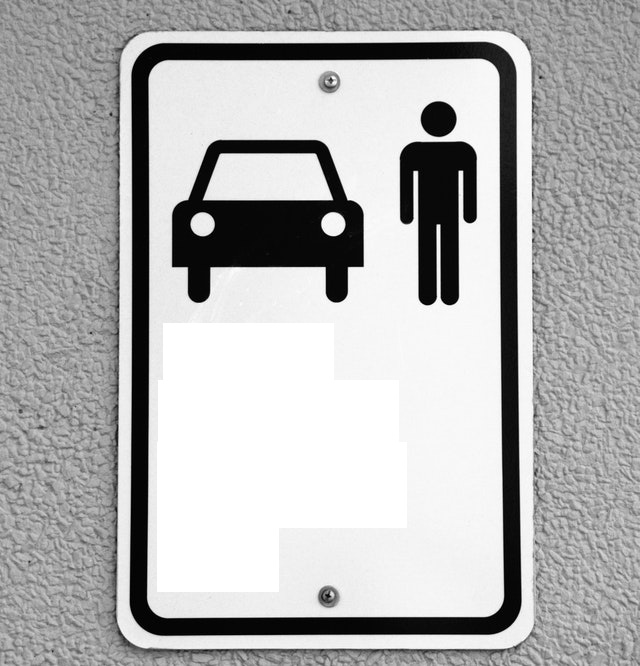

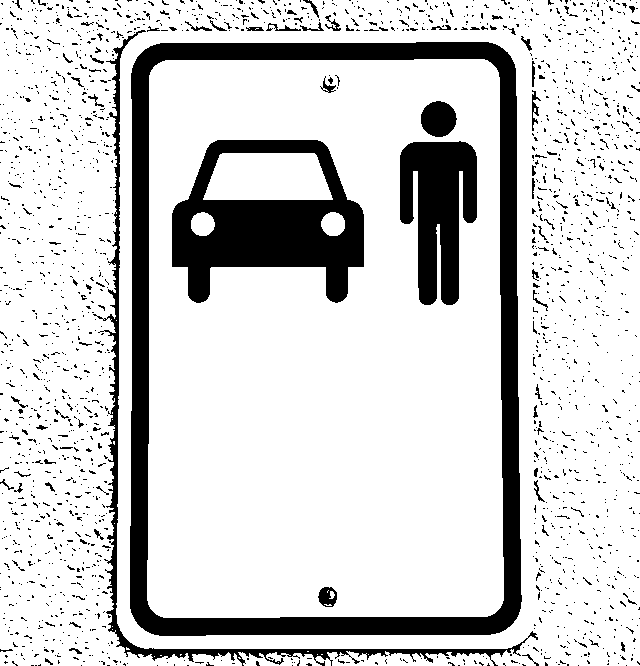

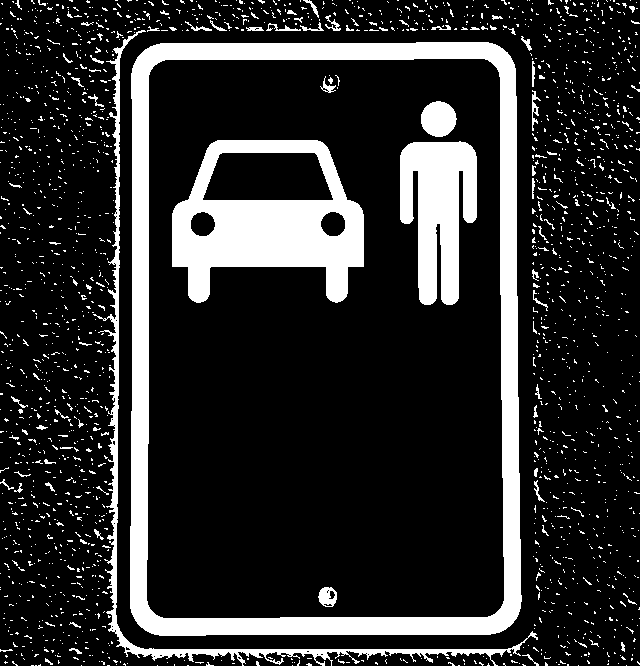

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img_source = cv2.imread('target.jpg',0)

ret,img_result1 = cv2.threshold(img_source, 127, 255, cv2.THRESH_BINARY)
ret,img_result2 = cv2.threshold(img_source, 127, 255, cv2.THRESH_BINARY_INV)


cv2_imshow(img_source)
cv2_imshow(img_result1)
cv2_imshow(img_result2)



# 새 섹션

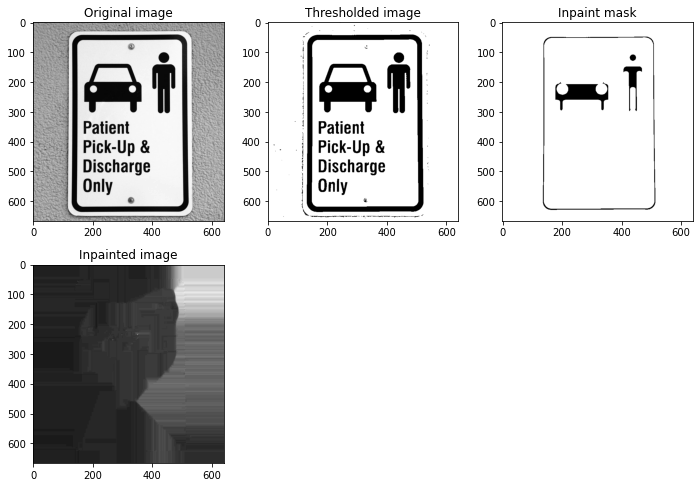

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Read image
img = cv2.imread('patient.jpg', cv2.IMREAD_GRAYSCALE)

# Binary threshold image
mask = cv2.threshold(img, 82, 255, cv2.THRESH_BINARY)[1]

# Remove small noise
inp_mask = cv2.morphologyEx(mask,
                            cv2.MORPH_OPEN,
                            cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

# Dilate mask
inp_mask = cv2.dilate(inp_mask,
                      cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15)))

# Inpaint
dst = cv2.inpaint(img, inp_mask, 15, cv2.INPAINT_NS)

# Show results
plt.figure(1, figsize=(10, 10))
plt.subplot(3, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(3, 3, 2), plt.imshow(mask, cmap='gray'), plt.title('Thresholded image')
plt.subplot(3, 3, 3), plt.imshow(inp_mask, cmap='gray'), plt.title('Inpaint mask')
plt.subplot(3, 3, 4), plt.imshow(dst, cmap='gray'), plt.title('Inpainted image')

plt.tight_layout()
plt.show()



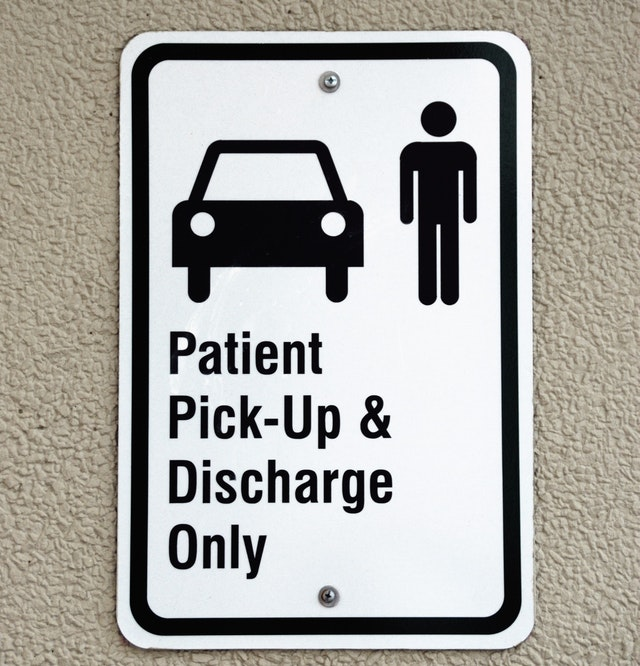

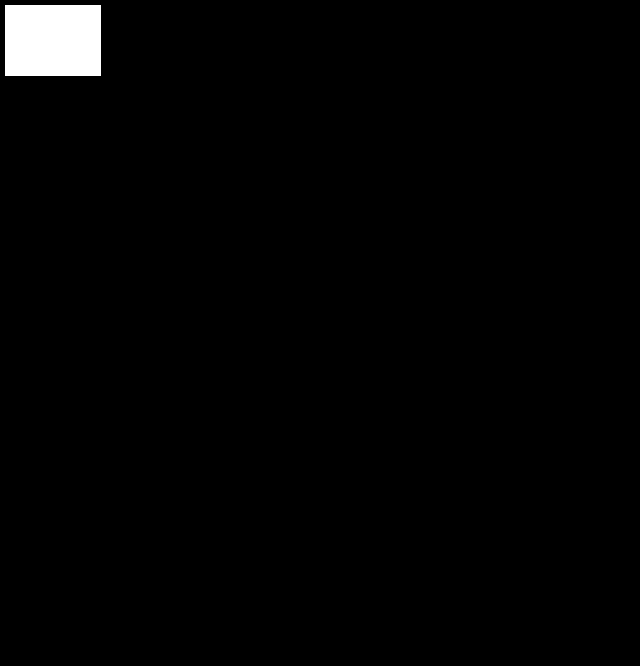

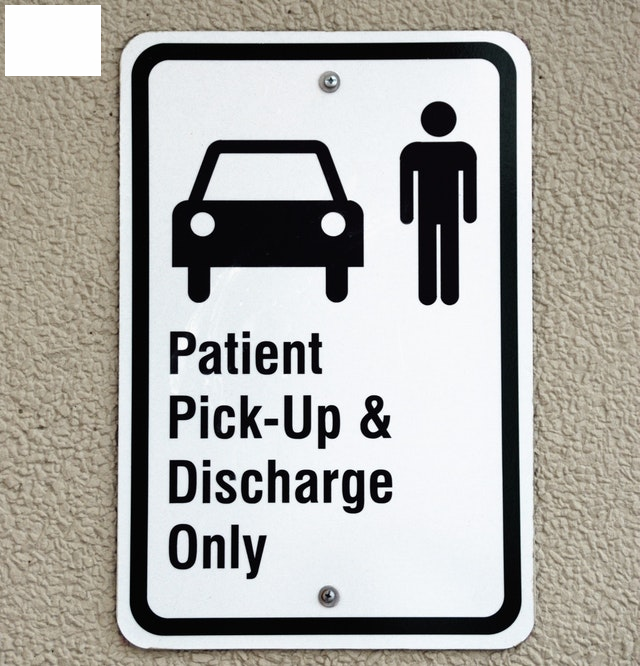

error: ignored

In [ ]:
import cv2
import numpy as np

# Load image
img = cv2.imread('patient.jpg')

# Initialize blank mask image of same dimensions for drawing the shapes
shapes = np.zeros_like(img, np.uint8)

# Draw shapes
cv2.rectangle(shapes, (5, 5), (100, 75), (255, 255, 255), cv2.FILLED)


# Generate output by blending image with shapes image, using the shapes
# images also as mask to limit the blending to those parts
out = img.copy()
alpha = 0.01
mask = shapes.astype(bool)
out[mask] = cv2.addWeighted(img, alpha, shapes, 1 - alpha, 0)[mask]

# Visualization
cv2_imshow(img)
cv2_imshow(shapes)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Read image
img = cv2.imread('patient.jpg', cv2.IMREAD_GRAYSCALE)

# Binary threshold image
mask = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)[1]

# Remove small noise
inp_mask = cv2.morphologyEx(mask,
                            cv2.MORPH_OPEN,
                            cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

# Dilate mask
inp_mask = cv2.dilate(inp_mask,
                      cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15)))

# Inpaint
dst = cv2.inpaint(img, inp_mask, 15, cv2.INPAINT_NS)

# Show results
plt.figure(1, figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(2, 2, 2), plt.imshow(mask, cmap='gray'), plt.title('Thresholded image')
plt.subplot(2, 2, 3), plt.imshow(inp_mask, cmap='gray'), plt.title('Inpaint mask')
plt.subplot(2, 2, 4), plt.imshow(dst, cmap='gray'), plt.title('Inpainted image')
plt.tight_layout()
plt.show()

In [ ]:
# # 필요 라이브러리 불러오기 
# import cv2 
# import numpy as np 
# import matplotlib.pyplot as plt 

# # 이미지 불러오기 
# args_image = "patient(.jpg / .png)" 
# img = cv2.imread(args_image) 

# for field in fields: 
#     verticies = field.get('boundingPoly').get('vertices') 
#     # bounding box의 좌표값 np.array 객체로 재구성하기 
#     box = np.array([tuple(v.values()) for v in verticies], np.int32) 
#     # bounding box 영역 이미지에 출력하기 
#     img = cv2.polylines(img, [box], True, (0,255,0), 2) 
#     # ocr결과 텍스트 bounding box 상단에 출력하기 
#     img = cv2.putText(img, field.get('inferText'), tuple(box[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0), 1) 
    
# # 이미지 출력하기 
# plt.imshow(img) 
# plt.show()